### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
datos = pd.concat([tienda, tienda2, tienda3, tienda4])
datos.reset_index(drop=True, inplace=True)


In [ ]:
datos.info()
datos.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
datos.groupby("Categoría del Producto")["Precio"].sum()


,Precio
Categoría del Producto,
Artículos para el hogar,5.757980e+07
Deportes y diversión,1.429777e+08
Electrodomésticos,1.324751e+09
Electrónicos,1.660576e+09
Instrumentos musicales,3.487726e+08
Juguetes,7.360440e+07
Libros,3.769610e+07
Muebles,7.576610e+08


In [ ]:
datos.groupby("Lugar de Compra")["Calificación"].mean()


,Calificación
Lugar de Compra,
Armenia,3.464286
Barranquilla,3.803226
Bogotá,4.113619
Bucaramanga,3.977901
Cali,4.046673
Cartagena,4.020661
Cúcuta,3.940860
Inírida,3.642857
Leticia,3.922535


In [ ]:
datos["Método de pago"].value_counts()


,count
Método de pago,
Tarjeta de crédito,6898
Nequi,1900
Cupón,504
Tarjeta de débito,133


#1. Análisis de facturación



In [ ]:
#facturación para cada tienda
tienda["Facturación"] = tienda["Precio"] + tienda["Costo de envío"]
tienda2["Facturación"] = tienda2["Precio"] + tienda2["Costo de envío"]
tienda3["Facturación"] = tienda3["Precio"] + tienda3["Costo de envío"]
tienda4["Facturación"] = tienda4["Precio"] + tienda4["Costo de envío"]


In [ ]:
fact_tienda1 = tienda["Facturación"].sum()
fact_tienda2 = tienda2["Facturación"].sum()
fact_tienda3 = tienda3["Facturación"].sum()
fact_tienda4 = tienda4["Facturación"].sum()


In [ ]:
facturacion_total = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Facturación Total": [fact_tienda1, fact_tienda2, fact_tienda3, fact_tienda4]
})

facturacion_total


,Tienda,Facturación Total
0,Tienda 1,1.212258e+09
1,Tienda 2,1.175829e+09
2,Tienda 3,1.156536e+09
3,Tienda 4,1.093693e+09


from matplotlib import pyplot as plt
facturacion_total['Facturación Total'].plot(kind='hist', bins=20, title='Facturación Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
facturacion_total.groupby('Tienda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
facturacion_total['Facturación Total'].plot(kind='line', figsize=(8, 4), title='Facturación Total')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(facturacion_total['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(facturacion_total, x='Facturación Total', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Facturación Total'].plot(kind='hist', bins=20, title='Facturación Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Tienda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Facturación Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Facturación Total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tienda')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tienda', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Facturación Total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tienda')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tienda', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Facturación Total'].plot(kind='line', figsize=(8, 4), title='Facturación Total')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Facturación Total', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

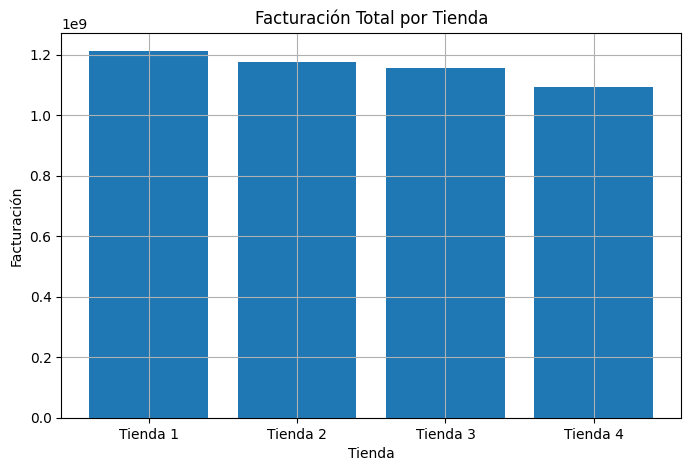

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(facturacion_total["Tienda"], facturacion_total["Facturación Total"])
plt.title("Facturación Total por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación")
plt.grid(True)
plt.show()


# 2. Ventas por categoría

In [ ]:

tienda["Facturación"] = tienda["Precio"] + tienda["Costo de envío"]
tienda2["Facturación"] = tienda2["Precio"] + tienda2["Costo de envío"]
tienda3["Facturación"] = tienda3["Precio"] + tienda3["Costo de envío"]
tienda4["Facturación"] = tienda4["Precio"] + tienda4["Costo de envío"]


In [ ]:
# Agrupamos y sumamos
ventas_cat_1 = tienda.groupby("Categoría del Producto")["Facturación"].sum()
ventas_cat_2 = tienda2.groupby("Categoría del Producto")["Facturación"].sum()
ventas_cat_3 = tienda3.groupby("Categoría del Producto")["Facturación"].sum()
ventas_cat_4 = tienda4.groupby("Categoría del Producto")["Facturación"].sum()


ventas_categorias = pd.DataFrame({
    "Tienda 1": ventas_cat_1,
    "Tienda 2": ventas_cat_2,
    "Tienda 3": ventas_cat_3,
    "Tienda 4": ventas_cat_4
}).fillna(0)


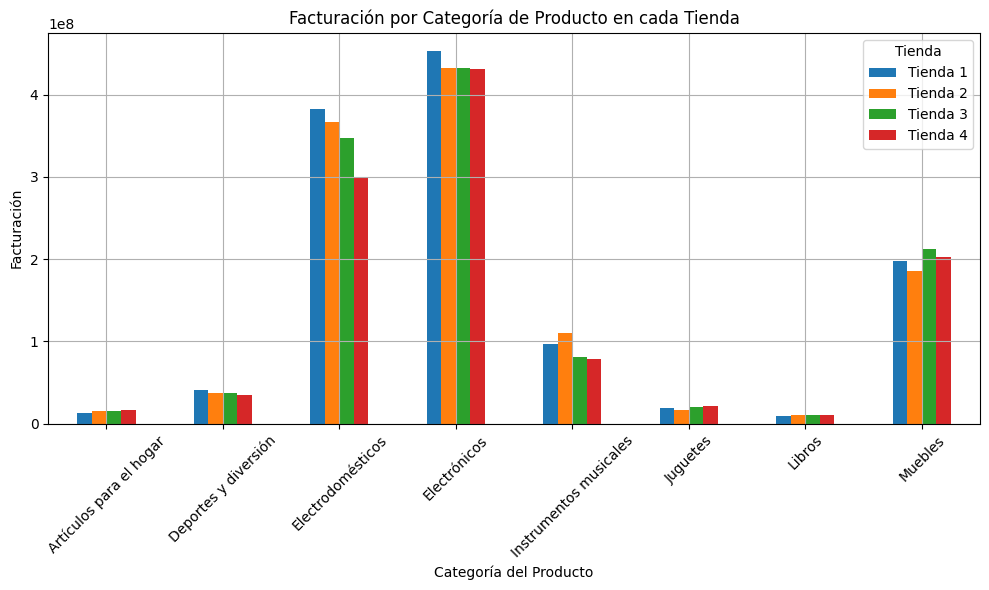

In [ ]:
ventas_categorias.plot(kind='bar', figsize=(10,6))
plt.title("Facturación por Categoría de Producto en cada Tienda")
plt.ylabel("Facturación")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
calif_1 = tienda["Calificación"].mean()
calif_2 = tienda2["Calificación"].mean()
calif_3 = tienda3["Calificación"].mean()
calif_4 = tienda4["Calificación"].mean()


In [ ]:
calificaciones = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [calif_1, calif_2, calif_3, calif_4]
})

calificaciones


,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


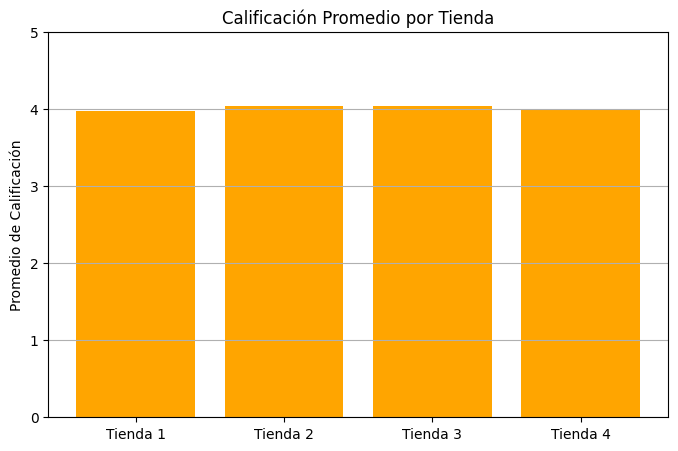

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(calificaciones["Tienda"], calificaciones["Calificación Promedio"], color='orange')
plt.ylim(0, 5)  # ya que la calificación es de 1 a 5
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Promedio de Calificación")
plt.grid(axis='y')
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
mas_vendidos_1 = tienda["Producto"].value_counts()
mas_vendidos_2 = tienda2["Producto"].value_counts()
mas_vendidos_3 = tienda3["Producto"].value_counts()
mas_vendidos_4 = tienda4["Producto"].value_counts()


In [ ]:
# Tienda 1
producto_top_1 = mas_vendidos_1.idxmax()
cantidad_top_1 = mas_vendidos_1.max()
producto_bottom_1 = mas_vendidos_1.idxmin()
cantidad_bottom_1 = mas_vendidos_1.min()

# Tienda 2
producto_top_2 = mas_vendidos_2.idxmax()
cantidad_top_2 = mas_vendidos_2.max()
producto_bottom_2 = mas_vendidos_2.idxmin()
cantidad_bottom_2 = mas_vendidos_2.min()

# Tienda 3
producto_top_3 = mas_vendidos_3.idxmax()
cantidad_top_3 = mas_vendidos_3.max()
producto_bottom_3 = mas_vendidos_3.idxmin()
cantidad_bottom_3 = mas_vendidos_3.min()

# Tienda 4
producto_top_4 = mas_vendidos_4.idxmax()
cantidad_top_4 = mas_vendidos_4.max()
producto_bottom_4 = mas_vendidos_4.idxmin()
cantidad_bottom_4 = mas_vendidos_4.min()


In [ ]:
productos_resumen = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Producto más vendido": [producto_top_1, producto_top_2, producto_top_3, producto_top_4],
    "Ventas (Top)": [cantidad_top_1, cantidad_top_2, cantidad_top_3, cantidad_top_4],
    "Producto menos vendido": [producto_bottom_1, producto_bottom_2, producto_bottom_3, producto_bottom_4],
    "Ventas (menos vendido)": [cantidad_bottom_1, cantidad_bottom_2, cantidad_bottom_3, cantidad_bottom_4]
})

productos_resumen


,Tienda,Producto más vendido,Ventas (Top),Producto menos vendido,Ventas (menos vendido)
0,Tienda 1,Microondas,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [ ]:
envio_1 = tienda["Costo de envío"].mean()
envio_2 = tienda2["Costo de envío"].mean()
envio_3 = tienda3["Costo de envío"].mean()
envio_4 = tienda4["Costo de envío"].mean()


In [ ]:
envios_promedio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Envío Promedio": [envio_1, envio_2, envio_3, envio_4]
})

envios_promedio


,Tienda,Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


from matplotlib import pyplot as plt
envios_promedio['Envío Promedio'].plot(kind='hist', bins=20, title='Envío Promedio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
envios_promedio.groupby('Tienda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
envios_promedio['Envío Promedio'].plot(kind='line', figsize=(8, 4), title='Envío Promedio')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(envios_promedio['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(envios_promedio, x='Envío Promedio', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Facturacion total por tienda


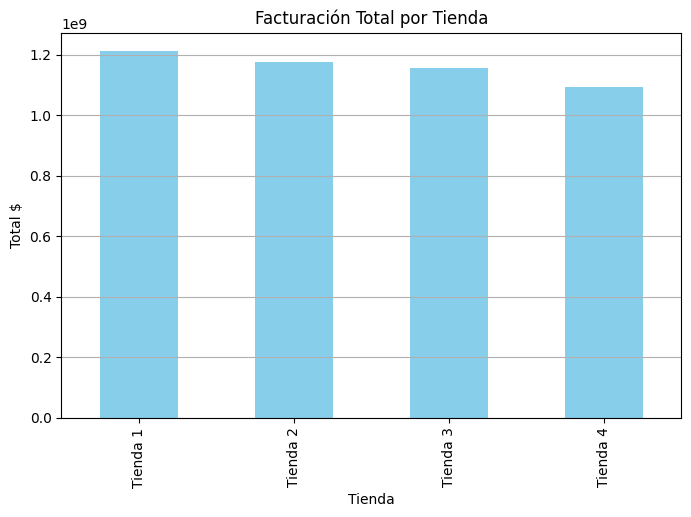

In [ ]:
facturacion_total.plot(kind='bar', x='Tienda', y='Facturación Total', legend=False, figsize=(8,5), color='skyblue')
plt.title("Facturación Total por Tienda")
plt.ylabel("Total $")
plt.grid(axis='y')
plt.show()


In [1]:
from google.colab import auth
auth.authenticate_user()


In [2]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [3]:
!git clone https://github.com/LeandroFuentesV/challenge1-data-science-latam-main.git


Cloning into 'challenge1-data-science-latam-main'...


In [4]:
%cd challenge1-data-science-latam-main


/content/challenge1-data-science-latam-main


In [5]:
%%writefile /content/challenge1-data-science-latam-main/README.md
# Informe Final - Análisis de Tiendas Alura Store

## Descripción

El objetivo de este análisis es ayudar al Sr. Juan a tomar una decisión informada sobre cuál de las tiendas de **Alura Store** debería vender para permitirle realizar una inversión en un nuevo negocio. Este informe se basa en un análisis de datos de ventas, calificaciones de clientes, categorías de productos más y menos vendidos, y el costo promedio de envío para cada tienda.

## Análisis Realizados

### 1. **Ingresos Totales de las Tiendas**
Se calculó el **ingreso total** de cada tienda sumando las ventas de cada transacción, considerando el precio y el costo de envío de los productos. Los ingresos totales de cada tienda son los siguientes:

- **Tienda 1**: $1,212,258,000
- **Tienda 2**: $1,175,829,000
- **Tienda 3**: $1,156,536,000
- **Tienda 4**: $1,093,696,000

**Conclusión**: La tienda con mayores ingresos es **Tienda 1**, mientras que la tienda con menores ingresos es **Tienda 4**, lo que sugiere que **Tienda 4** tiene el rendimiento más bajo en términos de ingresos.

### 2. **Categorías de Productos Más y Menos Vendidas**
Se realizó un análisis de las categorías de productos más vendidas en cada tienda. Aquí están los resultados:

- **Tienda 1**: Electrónica
- **Tienda 2**: Electrónica
- **Tienda 3**: Muebles
- **Tienda 4**: Muebles

**Productos menos vendidos**: En todas las tiendas, las categorías de **Artículos para el hogar** y **Juguetes** fueron las menos populares.

### 3. **Calificación Promedio de los Clientes**
Se calculó la **calificación promedio** de los clientes para cada tienda. Los resultados fueron los siguientes:

- **Tienda 1**: 3.98
- **Tienda 2**: 4.04
- **Tienda 3**: 4.05
- **Tienda 4**: 3.99

**Conclusión**: La **Tienda 3** tiene la calificación promedio más alta, lo que indica una mejor satisfacción de los clientes en comparación con las otras tiendas.

### 4. **Productos Más y Menos Vendidos**
Los productos más vendidos y menos vendidos en cada tienda fueron los siguientes:

- **Tienda 1**:
  - Más vendido: **Micronadas**
  - Menos vendido: **Auriculares con micrófono**

- **Tienda 2**:
  - Más vendido: **Iniciando en programación**
  - Menos vendido: **Juego de mesa**

- **Tienda 3**:
  - Más vendido: **Kit de bancas**
  - Menos vendido: **Bloques de construcción**

- **Tienda 4**:
  - Más vendido: **Cama box**
  - Menos vendido: **Guitarra eléctrica**

### 5. **Costo Promedio de Envío**
Se calculó el **costo promedio de envío** para cada tienda:

- **Tienda 1**: $26,018.61
- **Tienda 2**: $25,216.24
- **Tienda 3**: $24,805.68
- **Tienda 4**: $23,459.46

**Conclusión**: **Tienda 4** tiene el costo de envío más bajo, lo que podría ser ventajoso para los clientes en términos de costos adicionales.

## Gráficos Generados

A continuación, se incluyen los gráficos que muestran las principales métricas analizadas:

- **Gráfico de Ingresos Totales por Tienda**:
  Muestra las comparaciones de los ingresos totales entre las tiendas.

- **Gráfico de Calificación Promedio por Tienda**:
  Muestra las calificaciones promedio de los clientes para cada tienda


Writing /content/challenge1-data-science-latam-main/README.md
